# Invistigating the Movie Industry

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The aim of this analysis is to provide the reader with some insights into the movie industry. More specifically, we examine the trends of variability in the production budget and subsequent revenue generated over the the past 50 years. Second, we peek into the relationship between a movie's runtime and its profitability. Finally, we investigate the nature of cast members' popularity and its distribution. However, those insights were only accessible to us after some extensive data munging, which will be briefly summarized as well.  

## Questions
- In what ways has the greater access to production equipment in recent years changed the budget and revenue of movies? 
- Is there greater disparity between the production budget between big studios and small movie makers in recent years?
- What is the optimal runtime for a movie?
- What is the distribution of actors' popularity? 

## Data Set

Attribute|Description
-------|-----------|
id| unique identifier for the movie
imdb_id| as given by IMDB 
popularity|from 0 to 100
budget| in dollars (not accounting for inflation)
revenue| in dollars (not accounting for inflation)
original_title| as recorded by IMDB
cast| 5 (or less) actors whose names appeared in billboards for the movie
homepage| url to the movie's homepage
director| name
tagline| popular phrase by the movie
keywords| as determined by IMDB
overview| brief description of plot
runtime| in minutes
genres| as determined by IMDB
production_companies| 5 (or less) participating companies
release_date| date of first airtime
vote_count| by online users on TMDB
vote_average| of online users on TMDB votes
release_year| same as release_date
budget_adj| in dollars (accounting for inflation)
revenue_adj| in dollars (accounting for inflation)

In [229]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [230]:
# load dataset
movies = pd.read_csv("../data/tmdb-movies.csv")
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [231]:
# check duplicates
print(f"Number of duplicates: {movies.duplicated().sum()}")
# drop duplicates
movies.drop_duplicates(inplace=True)

Number of duplicates: 1


In [232]:
# check attributes data types and missing values
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [233]:
# get a high level look on the numeric data
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning


In [234]:
# take a look at movies['cast'] attribute
movies['cast'].head()

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4    Vin Diesel|Paul Walker|Jason Statham|Michelle ...
Name: cast, dtype: object

Untidy data in this attribute... Let's clean it up

In [235]:
# for use in split_attribute()
def get_element(elements_ser, index):
    """returns element with given index 
    if it exists, otherwise returns np.nan
    """
    try:
        return elements_ser[index]
    except:
        return np.nan
    
# create a separate attribute for each member
def split_attribute(df, attribute_name):
    """given a dataframe with an untidy attribute
    with a string of many values seperated by a "|" charachter

    Args:
        df (pd.DataFrame): dataframe to be edited
        attribute_name (string): where df[attribute_name] 
                                    should be cleaned
    Returns:
        cleaned dataframe
    """
    df[attribute_name] = df[attribute_name].apply(lambda s: s.split("|") if isinstance(s, str) else np.nan)
    # movies['cast'].head()
    # first check the number of cast members in each movie
    min_elements = int(df[attribute_name].apply(lambda lst: len(lst) if isinstance(lst, list) else np.nan).min())
    # print(f"The minimum number of {attribute_name}: {min_elements:.0f}")
    max_elements = int(df[attribute_name].apply(lambda lst: len(lst) if isinstance(lst, list) else np.nan).max())
    # print(f"The maximum number of {attribute_name}: {max_elements:.0f}")
       
    # split list containing cast members into series    
    attribute_elements = []
    for i in range(1, max_elements+1):
        attribute_elements.append(df[attribute_name].apply(lambda lst: get_element(lst, i-1)))

    # add new attributes to movies dataframe
    for index, series in enumerate(attribute_elements):
        df[f"{attribute_name}_{index+1}"] = series

    df.drop(columns=attribute_name, inplace=True)
    # movies.head()
        


In [236]:
# replace untidy attributes with tidy attributes
untidy_attributes = ['keywords', 'genres', 'cast', 'production_companies']

for attribute in untidy_attributes:
    split_attribute(movies, attribute)
    

Create 20 attributes with one string in each attribute to replace: <code>keywords</code>, <code>genres</code>, <code>cast</code>, and <code>production_campanies</code>. 

In [237]:
# encode missing values with np.nan instead of 0
monetary_attributes = ['budget_adj', 'revenue_adj']
for attribute in monetary_attributes:
    movies[attribute] = movies[attribute].apply(lambda x: x if x != 0 else np.nan)

In [238]:
# drop unnecessary attributes
unnecessary_attributes = ['budget', 'revenue', 'homepage', 'tagline', 'overview']
movies.drop(columns=unnecessary_attributes, inplace=True)
movies.head()

,id,imdb_id,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,...,cast_1,cast_2,cast_3,cast_4,cast_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,135397,tt0369610,32.985763,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,tt1392190,28.419936,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,NaN,NaN,NaN
2,262500,tt2908446,13.112507,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,NaN
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,NaN,NaN
4,168259,tt2820852,9.335014,Furious 7,James Wan,137,4/1/15,2947,7.3,2015,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [239]:
# check missing values after proper encoding
movies.revenue_adj.info()

<class 'pandas.core.series.Series'>
Int64Index: 10865 entries, 0 to 10865
Series name: revenue_adj
Non-Null Count  Dtype  
--------------  -----  
4849 non-null   float64
dtypes: float64(1)
memory usage: 169.8 KB


We can see that half of our revenue attribute is missing! Since this attribute is so important, we will still analyze it despite the large number of missing values. However, since this may bias our analysis, further investigation of the cause of the missing values is necessary.

<a id='eda'></a>
## Exploratory Data Analysis



array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>]],
      dtype=object)

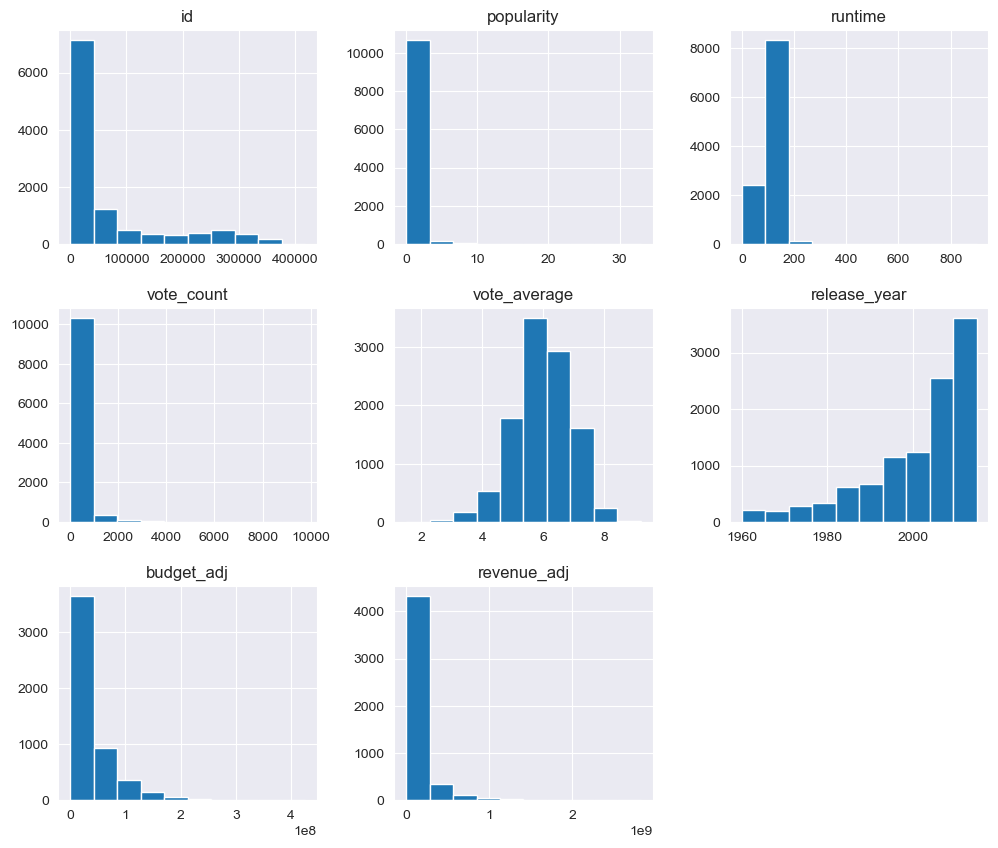

In [240]:
movies.hist(figsize=(12, 10))

### Research question 1: What are the budget and revenue variability trends over the years?

In [241]:
# calculate the mean and standard deviation for each year
budget_std = movies.groupby("release_year").std()['budget_adj']
revenue_std = movies.groupby("release_year").std()['revenue_adj']
budget_mean = movies.groupby("release_year").mean()['budget_adj']
revenue_mean = movies.groupby("release_year").mean()['revenue_adj']
years = pd.Series(budget_std.index)

Text(0, 0.5, 'Revenue Standard Deviation')

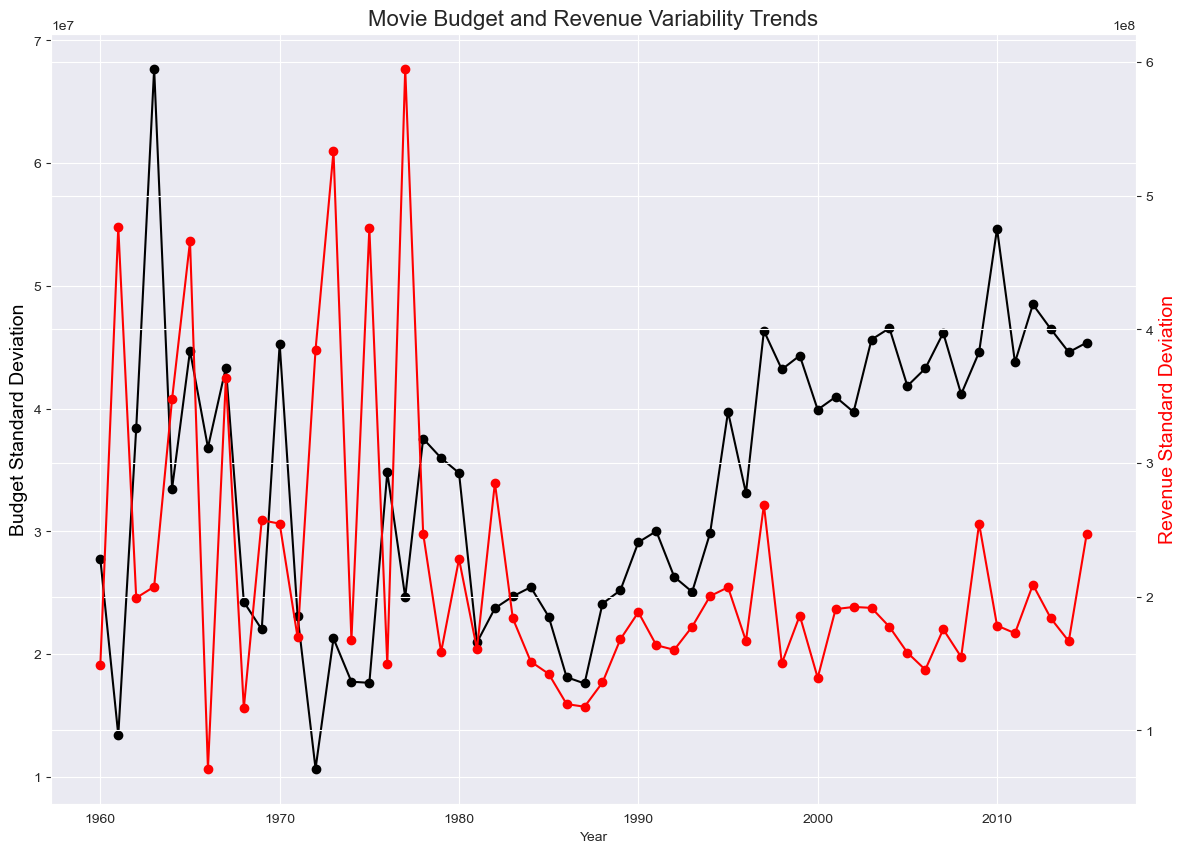

In [242]:
# plot the standard deviation of budget and revenue
fig, ax = plt.subplots()
fig.set_figwidth(14)
fig.set_figheight(10)
ax.plot(years, budget_std, marker="o", color="black")
ax.set_xlabel("Year")
# ax.tick_params()
ax.set_ylabel("Budget Standard Deviation", fontsize=14, color="black")
ax.set_title("Movie Budget and Revenue Variability Trends", fontsize=16)
# add second line plot with new y-axis
ax2 = ax.twinx()
ax2.plot(years, revenue_std, marker="o", color="red")
ax2.set_ylabel("Revenue Standard Deviation", fontsize=14, color="red")


It is difficult to see any patterns in this plot; the data is too noisy. We should do the plot but minimize the noise somehow.

Text(0, 0.5, 'Revenue Standard Deviation')

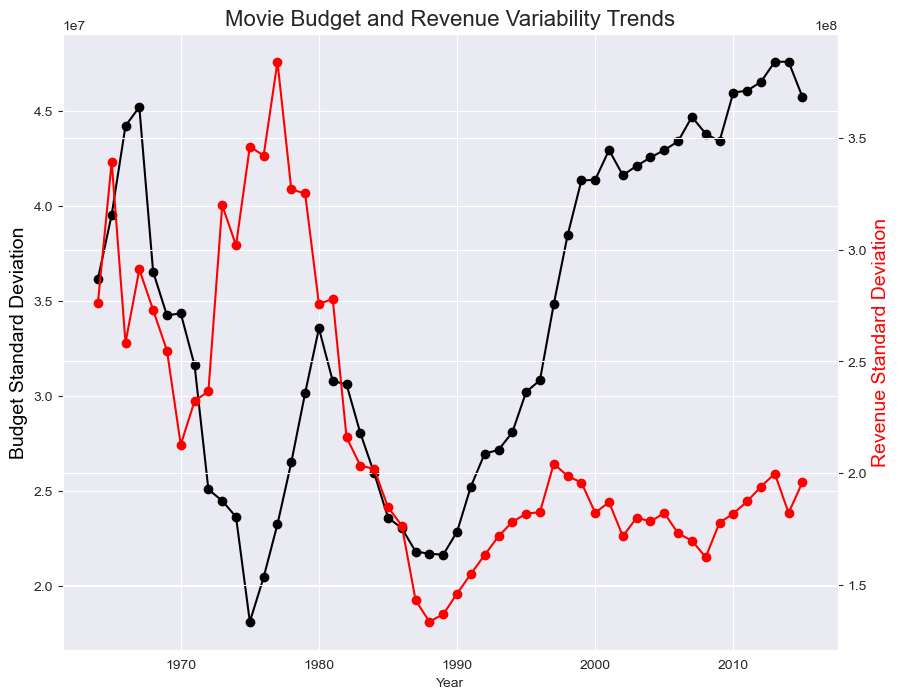

In [243]:
# calculate moving average
budget_std_rolling = budget_std.rolling(5).mean()
revenue_std_rolling = revenue_std.rolling(5).mean()
# plot moving average of standard deviation
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
ax.plot(years, budget_std_rolling, marker="o", color="black")
ax.set_xlabel("Year")
# ax.tick_params()
ax.set_ylabel("Budget Standard Deviation", fontsize=14, color="black")
ax.set_title("Movie Budget and Revenue Variability Trends", fontsize=16)
# add second line plot with new y-axis
ax2 = ax.twinx()
ax2.plot(years, revenue_std_rolling, marker="o", color="red")
ax2.set_ylabel("Revenue Standard Deviation", fontsize=14, color="red")

We can see that the budget standard deviation was relatively small since the year 1970, but got higher since the 2000s, which means big studios' resources were much greater than small movie creators' resources, relative to previous decades. On the other hand, revenue standard deviation got significantly lower since the highs of the 1980s (little less than a 50% drop in variation), which means there were no big winners and big losers in recent years, rather, movies generated comparable revenues.

It is difficult to compare the trends between the budget and revenue standard deviation because they are on a different scale. We can use the Coefficient of Variation to overcome this limitation.

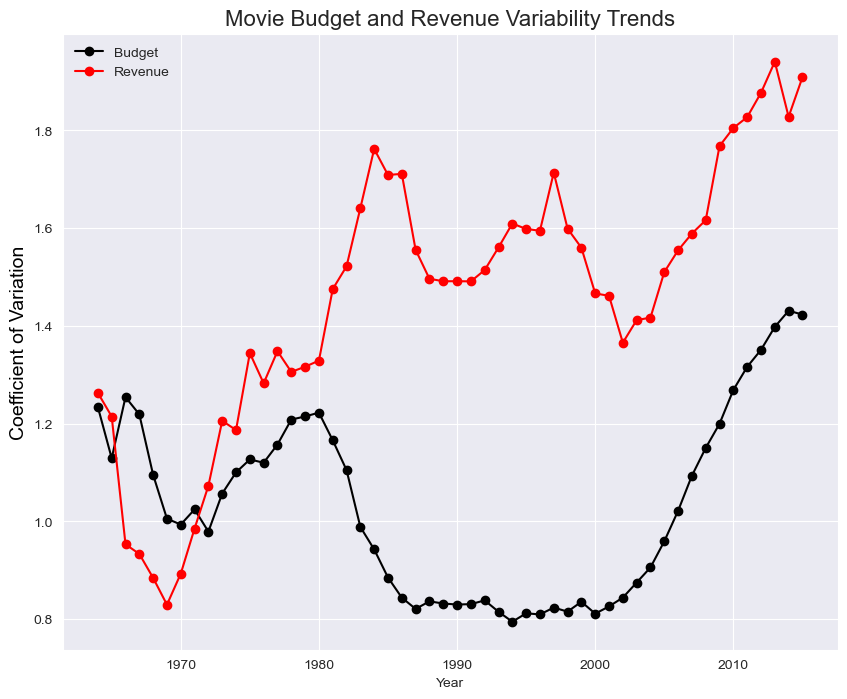

In [244]:
# calculate rolling coefficients of variance
budget_cv = (budget_std / budget_mean).rolling(5).mean()
revenue_cv = (revenue_std / revenue_mean).rolling(5).mean()
# print(budget_cv)
# plot coefficients of variance
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
ax.plot(years, budget_cv, marker="o", color="black", label="Budget")
ax.set_xlabel("Year")
# ax.tick_params()
ax.set_ylabel("Coefficient of Variation", fontsize=14, color="black")
ax.set_title("Movie Budget and Revenue Variability Trends", fontsize=16)
# add second line plot with new y-axis
# ax2 = ax.twinx()
# ax2.plot(years, revenue_std_rolling, marker="o", color="red")
# ax2.set_ylabel("Revenue Standard Deviation", fontsize=14, color="red")
ax.plot(years, revenue_cv, marker="o", color="red", label="Revenue")
ax.legend(loc='upper left', frameon=False)

In this plot we can see that, generally, the revenues movies generate are more variable than the budgets. Also, we can see that both measures in the plot soard to high levels since the mid 2000s. However, looking at the previous plot, we would see that variation remained quite steady in both measures since the mid 2000s. I can't explain the cause of this apparent discrepancy.

The overwhilming majority of actors who make it to the billboards as noteworthy cast members () only make it less than 10 times. However, it is difficult to asses the relative frequency of occurrences greater than 10 times. Let's see if we can fix this by limiting the height of the y-axis.

### Research question 2: Are longer movies more profitable?

In [245]:
# create a column for the return on investment ratio

# find the movies where we have both the budget and revenue data
movies_exc = movies.loc[~ movies.revenue_adj.isna() & ~ movies.budget_adj.isna()]
revenue = movies_exc['revenue_adj']
budget = movies_exc['budget_adj']
investment_return = revenue / budget
profitable = investment_return > 1.0

In [246]:
print(f"Ratio of non-profitable movies to all movies: {(profitable.shape[0] - profitable.sum()) / profitable.shape[0]}")
print(f"Median profit ratio: {investment_return.median()}")
# print("The numbers don't add up!")

Ratio of non-profitable movies to all movies: 0.27919045147898286
Median profit ratio: 2.11968951857143


In [247]:
investment_return.shape

(3854,)

Almost half of our dataset is missing either the budget or the revenue data, which raises considerable concerns regarding the cause of the high number of missing data, and whether the missingness is distributed completely at random or if is a particular cluster of movies that has those missing values.

In [248]:
# add profitability of movies as attribute
movies_exc['profitable'] = profitable
movies_exc['investment_return'] = investment_return

# add 4 levels of profitability 
q0_profitability= movies_exc['investment_return'].quantile(0)
Q1_profitability= movies_exc['investment_return'].quantile(0.25)
Q2_profitability= movies_exc['investment_return'].quantile(0.5)
Q3_profitability=movies_exc['investment_return'].quantile(0.75)
q100_profitability = movies_exc['investment_return'].quantile(1)
movies_exc['profitable_levels'] = pd.cut(movies_exc.investment_return, 
                                     bins=[q0_profitability, Q1_profitability, 
                                           Q2_profitability, Q3_profitability, q100_profitability], 
                                     labels=['non_profitable', 'low_profitable',
                                             'mid_high_profitable', 'high_profitable'])

In [249]:
# add 4 levels of profitability 
q0 = movies_exc['runtime'].quantile(0)
# Q1 = movies_exc['investment_return'].quantile(0.25)
Q2 = movies_exc['runtime'].quantile(0.5)
# Q3 =movies_exc['investment_return'].quantile(0.75)
q100 = movies_exc['runtime'].quantile(1)
movies_exc['runtime_levels'] = pd.cut(movies_exc.runtime, 
                                     bins=[q0, Q2, q100], 
                                     labels=['short', 'long',])

In [250]:
# get value counts of profitability_levels for short and long movies

order = ['non_profitable', 'low_profitable',
                        'mid_high_profitable', 'high_profitable']

short_val_counts = movies_exc.groupby('runtime_levels')['profitable_levels'].value_counts()['short']
long_val_counts = movies_exc.groupby('runtime_levels')['profitable_levels'].value_counts()['long']

print(short_val_counts.sum())
print(long_val_counts.sum())
movies_exc[['profitable_levels', 'runtime_levels']].info()


2021
1831
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   profitable_levels  3853 non-null   category
 1   runtime_levels     3853 non-null   category
dtypes: category(2)
memory usage: 38.0 KB


Create a count for the profitability levels for long and short movies. However, since the number of long and short movies is not equal (for unclear reasons since one contains the values greater than the median and one contains values less than the median), we should calculate the ratio rather than absolute numbers.

In [251]:
# calculate ratios

short_count = short_val_counts.sum()
long_count = long_val_counts.sum()

short_val_counts = short_val_counts / short_count
long_val_counts = long_val_counts / long_count

Now we are ready to plot..

In [252]:
# the width of the bar
width = 0.35
# the location of the x axis ticks
x = np.linspace(0, 3, 4)
# utilize seaborn styles for nicer plots
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Return on Investment V.S. Movie Runtime')

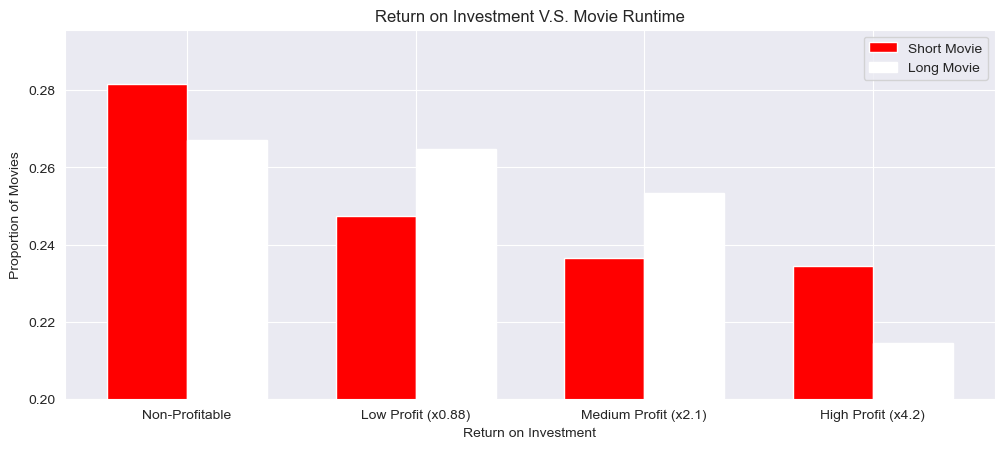

In [253]:
# plot barplot

plt.bar(x, short_val_counts, width, label="Short Movie", color="red")
plt.bar(x+width, long_val_counts, width, label="Long Movie", color="white")
plt.legend()

locations = x + width / 2
labels = ['Non-Profitable', f'Low Profit (x{Q1_profitability:.2})', f'Medium Profit (x{Q2_profitability:.2})', f"High Profit (x{Q3_profitability:.2})"]

plt.xticks(locations, labels)
plt.ylim(0.2)
plt.gcf().set_figwidth(12)
plt.xlabel("Return on Investment")
plt.ylabel("Proportion of Movies")
plt.title("Return on Investment V.S. Movie Runtime")

We can observe that short movies are over represented in the Non-Profitable category as well as the High Profit Category. On the other hand, longer movies tend not to generate very high profit margens, but less commonly are non-profitable.

### Research question 3: What is the distribution of actors' popularity?

In [254]:
all_cast = pd.concat([movies.cast_1,
movies.cast_2,
movies.cast_3,
movies.cast_4,
movies.cast_5])

all_cast.value_counts()

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
                     ..
Jared Gilman          1
Nestor Serrano        1
Jeff Turley           1
Joseph Gilgun         1
Stephanie Nielson     1
Length: 19026, dtype: int64

Text(0, 0.5, 'Number of actors')

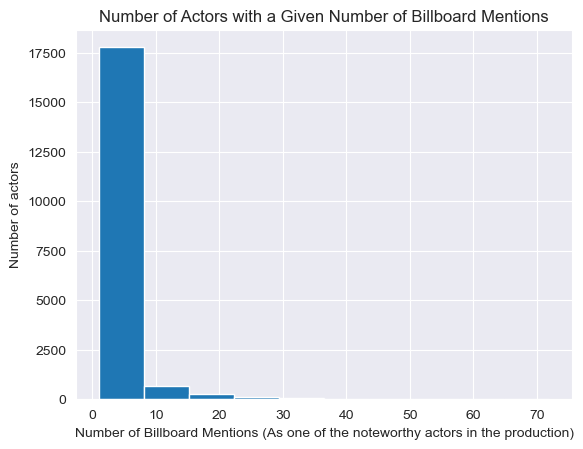

In [255]:
plt.hist(all_cast.value_counts())
plt.title("Number of Actors with a Given Number of Billboard Mentions")
plt.xlabel("Number of Billboard Mentions (As one of the noteworthy actors in the production)")
plt.ylabel("Number of actors")
# plt.ylim(top=100)

(0.0, 200.0)

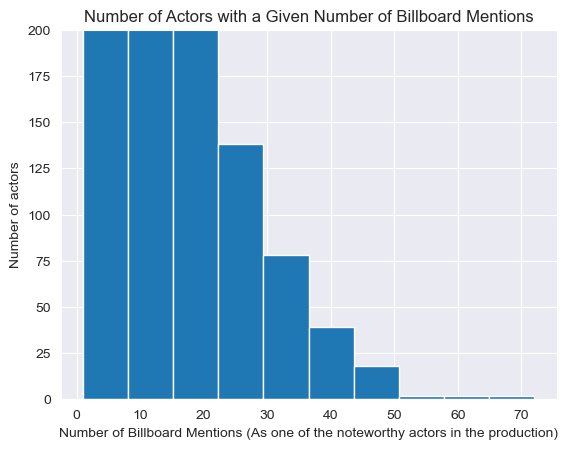

In [256]:
plt.hist(all_cast.value_counts())
plt.title("Number of Actors with a Given Number of Billboard Mentions")
plt.xlabel("Number of Billboard Mentions (As one of the noteworthy actors in the production)")
plt.ylabel("Number of actors")
plt.ylim(top=200)

We can see that there the popularity distribution is extremely right skewed, as the following statistical summary further confirms.

In [259]:
print(f"The mode is: {all_cast.value_counts().mode()[0]}")
print(f"The mean is: {all_cast.value_counts().mean():.3}")
print(f"The median is: {all_cast.value_counts().median()}")

The mode is: 1
The mean is: 2.76
The median is: 1.0


<a id='conclusions'></a>
## Conclusions


* Budgets invested and revenues generated has seen more variability in the past two decades than observed previously.
* Revenues tend to be more variable than budgets.
* Movies with runtime greater than the median have a higher chance of being profitable. (confounding variables may be present.)
* If a short movie IS profitable, it has a high chance of being extremely profitable (x4 return on investment).
* The popularity distribution of actors is extremely right skewed.


Refrences:
Python Data Science Handbook